In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [9]:
df = pd.read_csv("actions2load.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'actions2load.csv'

## EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s


In [4]:
df.dtypes

account_id         object
event_time         object
event_type         object
product_id          int64
additional_data    object
dtype: object

In [5]:
df.shape

(3242076, 5)

In [6]:
df.nunique()

account_id           89467
event_time         2940583
event_type              35
product_id             740
additional_data     248390
dtype: int64

# Analysis of missing data(i.e in the additional_data column)

In [7]:
df.isnull().sum()

account_id              0
event_time              0
event_type              0
product_id              0
additional_data    516123
dtype: int64

# FIXING BAD DATA

In [8]:
#the column with the most null values will be dropped i.e 'additional_data'
df.drop(['additional_data'], axis = 1)

,account_id,event_time,event_type,product_id
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073
...,...,...,...,...
3242071,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.485,FirstManningAccess,-1
3242072,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.486,FirstLivebookAccess,-1
3242073,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.613,FirstLivebookAccess,-1
3242074,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.612,FirstManningAccess,-1


In [9]:
df.isnull().sum()

account_id              0
event_time              0
event_type              0
product_id              0
additional_data    516123
dtype: int64

In [10]:
df.nunique()

account_id           89467
event_time         2940583
event_type              35
product_id             740
additional_data     248390
dtype: int64

# CHECK FOR CLASS IMBALANCE

In [11]:
event_counts = df['event_type'].value_counts()
print (event_counts)

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

### THE MOST COMMON AND LEAST COMMON EVENT

In [12]:
#To get the event frequency
event_frequency = df["event_type"].value_counts()

In [13]:
print (event_frequency)

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

# VISUAL REPRESENTATION OF THE COUNT OF EVENTS BY HOUR

In [14]:
plt.figure(figsize = (10,6))
plt.bar(event_counts_by_hour. index, event_counts_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.title('Event counts by hour')
plt.show()

NameError: name 'event_counts_by_hour' is not defined

<Figure size 1000x600 with 0 Axes>

In [14]:
#The most common event is readingOwnedBook
#The least common event is CommentCreated
print ('The most common event is:',event_frequency.idxmax())
print ('The least common event is:',event_frequency.idxmin())

The most common event is: ReadingOwnedBook
The least common event is: CommentCreated


# Account ID with highest and lowest number of events

In [15]:
df["account_id"].value_counts()

6bb61e3b7bce0931da574d19d1d82c88    1371593
86c876e217ae1ca1cd2986c5521a9768      17357
0c2a23a1ce63aa22296072df5cd065f7       5697
954c5420b7247345858b62c84d606bb7       5690
4de78691553567a9b9e20fde6667773b       4890
                                     ...   
8a831a7856dc0da98c6be48f705dcce8          1
155487ef76edc522f21a6fb177eaed78          1
bb7c0b0484f1908b7d85520a0429a826          1
b615e5a363163bc167b877cf34037568          1
3519f4939d54c1911afa74226a78c3f9          1
Name: account_id, Length: 89467, dtype: int64

In [16]:
print ('Account_id with the highest number of events is:', df["account_id"]. value_counts().idxmax())
print ('Account_id with the lowest number of events is:', df["account_id"]. value_counts().idxmin())

Account_id with the highest number of events is: 6bb61e3b7bce0931da574d19d1d82c88
Account_id with the lowest number of events is: 96d5a9368c0d2c2febc62ea760a6a96c


# Event occurence based on the time of the day

In [17]:
#Firstly, convert event_time dtype to datetime format
df["event_time"] = pd.to_datetime(df["event_time"])

In [18]:
df.dtypes

account_id                 object
event_time         datetime64[ns]
event_type                 object
product_id                  int64
additional_data            object
dtype: object

In [19]:
#To create a new column called "event_year"
df["event_year"] = df["event_time"].dt.year

In [20]:
#To create a new column called "event_month"
df["event_month"] = df["event_time"].dt.month_name(locale = 'English')

In [21]:
#To create a new column called "day_of_the_week"
df["day_of_the_week"] = df["event_time"].dt.day_name(locale = 'English')

In [22]:
#To create a new column called "event_time_of_the_day"
df["event_time_of_the_day"] = df["event_time"].dt.time

In [23]:
df.head()

,account_id,event_time,event_type,product_id,additional_data,event_year,event_month,day_of_the_week,event_time_of_the_day
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,2019,November,Friday,12:10:08.154000
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,2019,November,Friday,12:10:19.962000
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,2019,November,Friday,12:11:20.707000
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,2019,November,Friday,12:11:41.283000
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,2019,November,Friday,12:11:58.253000


In [24]:
df.nunique()

account_id                 89467
event_time               2940583
event_type                    35
product_id                   740
additional_data           248390
event_year                     2
event_month                    8
day_of_the_week                7
event_time_of_the_day    2890131
dtype: int64

In [25]:
df["event_year"].value_counts()

2020    2938654
2019     303422
Name: event_year, dtype: int64

In [26]:
df["event_month"].value_counts()

April       946620
May         811680
March       569745
December    296113
January     267102
February    264952
June         78555
November      7309
Name: event_month, dtype: int64

Text(0.5, 1.0, 'Monthly Subscription')

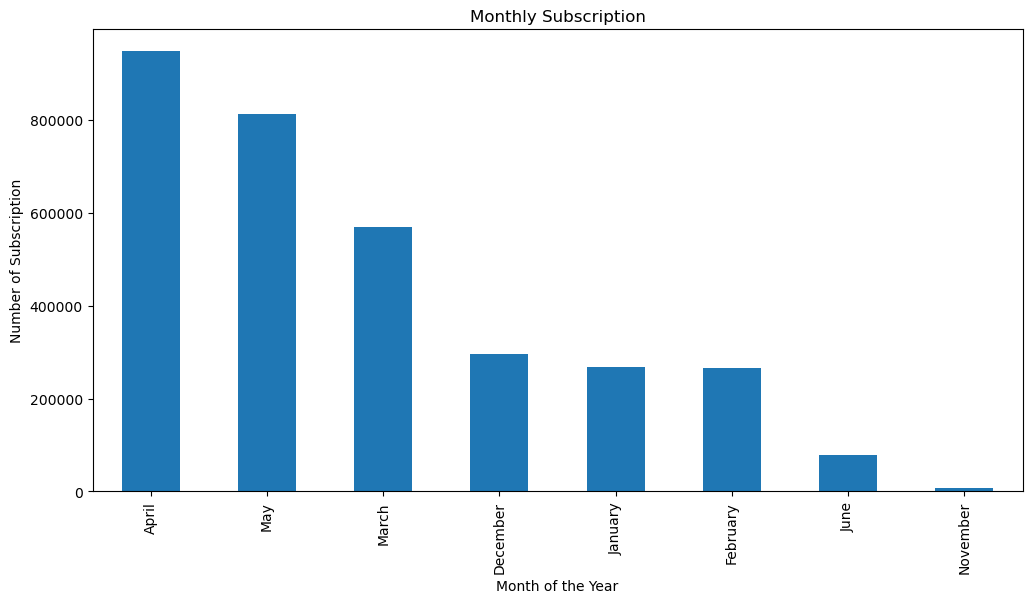

In [27]:
df["event_month"].value_counts().plot.bar(figsize = (12,6))
plt.ylabel("Number of Subscription")
plt.xlabel("Month of the Year")
plt.title("Monthly Subscription")

In [1]:
df["event_time_of_the_day"].value_counts().plot.bar(figsize = (12,6))
plt.ylabel("Number of Subscription")
plt.xlabel("Month of the Year")
plt.title("Monthly Subscription")

NameError: name 'df' is not defined

In [38]:
(df["event_time_of_the_day"],["account_id"])
plt.figure(figsize = (10,6))
plt.bar("event_time_of_the_day",'event_type'.values)
plt.xlabel("event_time_of_the_day")
plt.ylabel('event_type')
plt.title("Account_id_Analysis")
plt.show()

AttributeError: 'str' object has no attribute 'values'

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize = (10,6))
df["event_time_of_the_day"].value_counts().plot.bar(figsize = (12,6))
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.title('Event Time of the Day')
plt.show()

KeyboardInterrupt: 

# To check for class inbalance

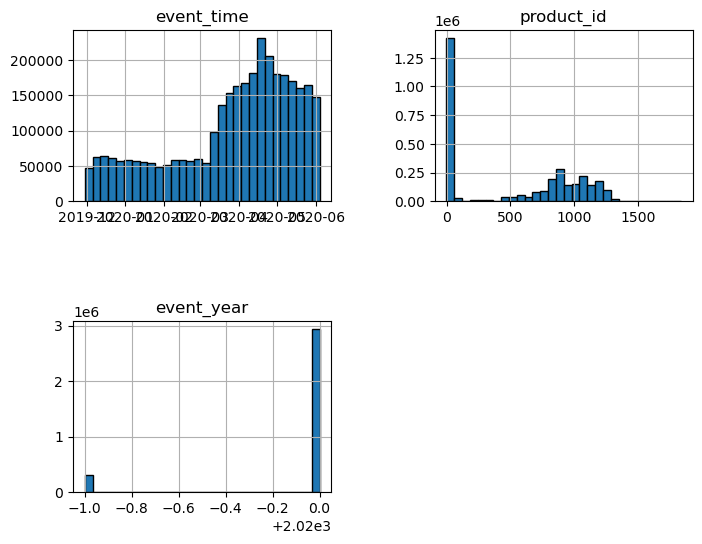

In [28]:
df.hist(figsize =(8,6), bins = 30, edgecolor = 'black')
plt.subplots_adjust(hspace = 0.7, wspace = 0.4)
              
              


In [18]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.boxplot(df['actions2load'], orient = 'horizontal')
plt.title('Box Plot')
plt.grid()

KeyError: 'actions2load'

<Figure size 1000x1000 with 0 Axes>